In [40]:
import numpy as np
import matplotlib.pyplot as plt

class TwoStarSolver:
    '''
    This class simulates the motion of two stars under the influence of Newtonian gravity.
    '''
    def __init__(self, m_star1, m_star2, r_start1, r_start2, G=6.67430e-11):
        self.G = G
        self.m_star1 = m_star1
        self.m_star2 = m_star2
        self.r_start1 = r_start1
        self.r_start2 = r_start2
        self.r_star1 = np.array([r_start1[0], r_start1[1]])  # Star 1 initial position
        self.r_star2 = np.array([r_start2[0], r_start2[1]])  # Star 2 initial position
        self.v_star1 = np.array([0, 0])  # Star 1 initially at rest
        self.v_star2 = np.array([0, 0])  # Star 2 initially at rest

    def update_position_velocity(self, dt):
        k1_r1, k1_v1, k1_r2, k1_v2 = self._compute_derivatives(self.r_star1, self.v_star1, self.r_star2, self.v_star2)
        k2_r1, k2_v1, k2_r2, k2_v2 = self._compute_derivatives(
            self.r_star1 + 0.5 * dt * k1_r1, self.v_star1 + 0.5 * dt * k1_v1,
            self.r_star2 + 0.5 * dt * k1_r2, self.v_star2 + 0.5 * dt * k1_v2
        )

        self.r_star1 = np.array(self.r_star1, dtype=float)  # Convert self.r_star1 to array with float data type
        self.v_star1 = np.array(self.v_star1, dtype=float)  # Convert self.v_star1 to array with float data type
        self.r_star2 = np.array(self.r_star2, dtype=float)  # Convert self.r_star2 to array with float data type
        self.v_star2 = np.array(self.v_star2, dtype=float)  # Convert self.v_star2 to array with float data type

        self.r_star1 += dt * np.array(k2_r1, dtype=float) # Ensure k2_r1 has the same data type as self.r_body
        self.v_star1 += dt * np.array(k2_v1, dtype=float) # Ensure k2_v1 has the same data type as self.v_body
        self.r_star2 += dt * np.array(k2_r2, dtype=float) # Ensure k2_r2 has the same data type as self.r_body
        self.v_star2 += dt * np.array(k2_v2, dtype=float) # Ensure k2_v2 has the same data type as self.v_body

    def _compute_derivatives(self, r1, v1, r2, v2):
        r12 = r2 - r1
        r12_norm = np.linalg.norm(r12)
        
        F1 = self.G * self.m_star1 * self.m_star2 / r12_norm**3 * r12
        F2 = -F1
        
        return v1, F1 / self.m_star1, v2, F2 / self.m_star2

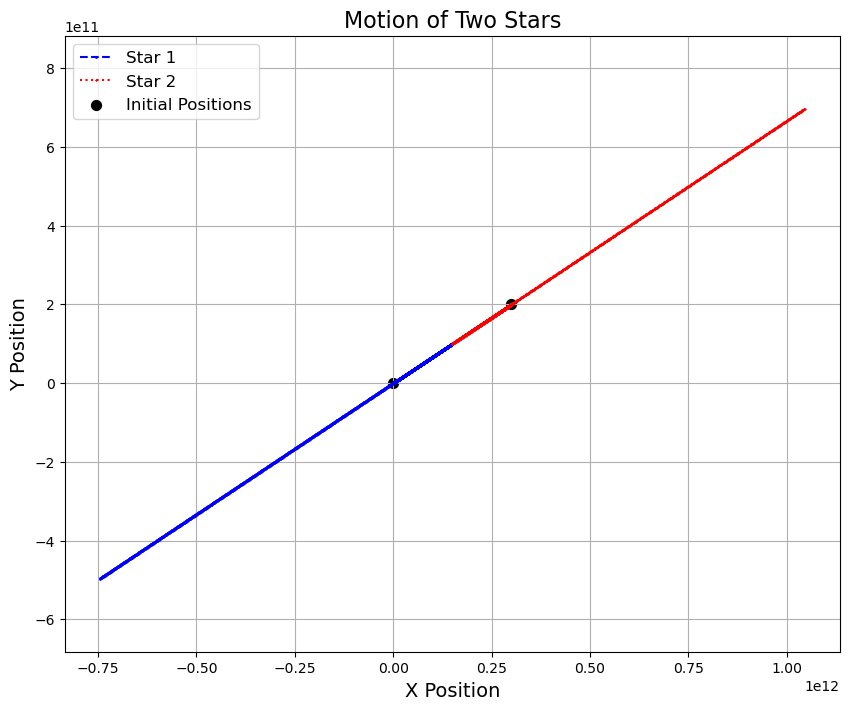

In [41]:
#Plot function
def plot_orbit(solver, num_steps, dt):
    positions1 = np.zeros((num_steps, 2))
    positions2 = np.zeros((num_steps, 2))
    for i in range(num_steps):
        positions1[i] = solver.r_star1
        positions2[i] = solver.r_star2
        solver.update_position_velocity(dt)
        
    plt.figure(figsize=(10, 8))
    plt.plot(positions1[:, 0], positions1[:, 1], label='Star 1', color='blue', linestyle='--', marker='o', markersize=1)
    plt.plot(positions2[:, 0], positions2[:, 1], label='Star 2', color='red', linestyle=':', marker='x', markersize=1)
    plt.scatter([positions1[0, 0], positions2[0, 0]], [positions1[0, 1], positions2[0, 1]], color='black', marker='o', s=50, label='Initial Positions')
    plt.xlabel('X Position', fontsize=14)
    plt.ylabel('Y Position', fontsize=14)
    plt.title('Motion of Two Stars', fontsize=16)
    plt.axis('equal')
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

# Parameters
m_star1 = 1.989e30  # Mass of star 1 (e.g., Sun) in kg
m_star2 = 1.989e30  # Mass of star 2 (e.g., Sun) in kg
r_start1 = np.array([0, 0])  # Initial position of star 1 at origin
r_start2 = np.array([3e11, 2e11])  # Initial position of star 2 at specified coordinates (x, y)
num_steps = 16000  # Number of time steps
dt = 1000  # Time step size in seconds

# Create solver instance
solver = TwoStarSolver(m_star1, m_star2, r_start1, r_start2)

# Plot orbit
plot_orbit(solver, num_steps, dt)
